## Exploratory Data Analysis

This document pre-analyzes our dataset. It contains two parts:
- The evolution of semiconductor technology, and the CPU single-core performance. 
- The evolution of processor architecture scales. We mainly picked the decode width (the maximum number of instructions being executed in parallel) and the ROB size (proportional to the window size of out-of-program-order execution). 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

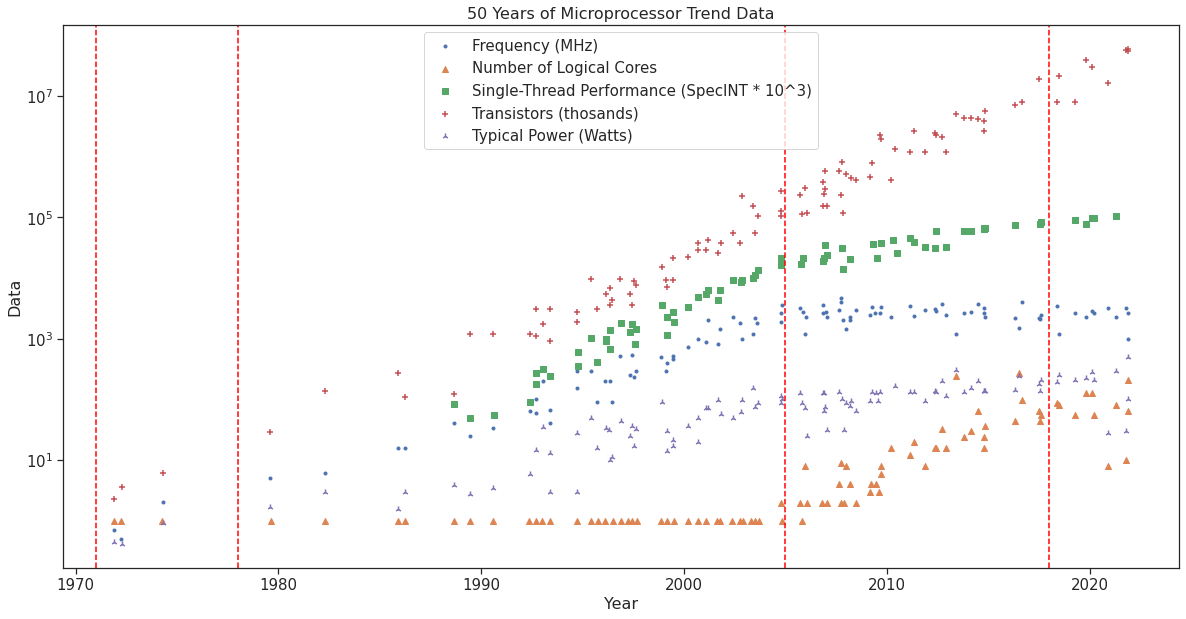

In [3]:
def get_data_lists(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        year_list = []
        data_list = []
        for line in lines:
            if "##" in line:
                continue
            year_list.append(float(line.split()[0]))         
            data_list.append(float(line.split()[1]))
    return year_list, data_list          
year_freq, data_freq = get_data_lists("./dataset/D-1/frequency.dat")
year_cores, data_cores = get_data_lists("./dataset/D-1/cores.dat")
year_specint, data_specint = get_data_lists("./dataset/D-1/specint.dat")
year_transistors, data_transistors = get_data_lists("./dataset/D-1/transistors.dat")
year_watts, data_watts = get_data_lists("./dataset/D-1/watts.dat")

# sns.set()
sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(year_freq, data_freq, label="Frequency (MHz)", marker=".")
plt.scatter(year_cores, data_cores, label="Number of Logical Cores", marker="^")
plt.scatter(year_specint, data_specint, label="Single-Thread Performance (SpecINT * 10^3)", marker="s")
plt.scatter(year_transistors, data_transistors, label="Transistors (thosands)", marker="+")
plt.scatter(year_watts, data_watts, label="Typical Power (Watts)", marker="2")

ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Data', fontsize=16)
ax.set_title('50 Years of Microprocessor Trend Data', fontsize=16)

yticks = [pow(10, i) for i in range(8)]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)
xticks = [1970 + i*10 for i in range(6)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=15)
ax.legend(fontsize=15)
plt.yscale('log')


for x in [1971, 1978, 2005, 2018]:
    plt.axvline(x=x, color='red', linestyle='--')

plt.show()

In the above figure, we have four phases of the development microprocessor:
* Early computer standalone transistors were manually designed (the 1970s to early 1980). The data point in this range is rare, and the chip performance is also small.
* Moore's law is in effect, and micro-architectures are developed (the 1980s to 2005). We can see all metrics grow exponentially, except that the number of cores is only one.
* Multicore comes to play (2005 to Now). Single-core performance grows slowly, and more cores are brought into a processor. 
* Specialized hardware (2016 to Now). Moore's law still gives us more transistor budgets, but we cannot turn all the transistors on due to the power density. Hardware specialized for specific tasks (e.g., Graph rendering) is also introduced on the CPU.

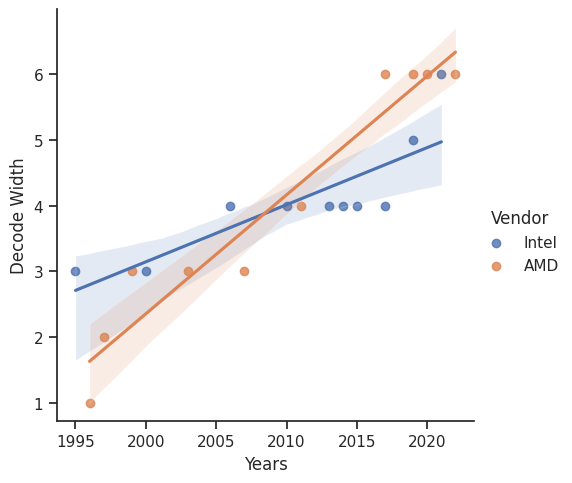

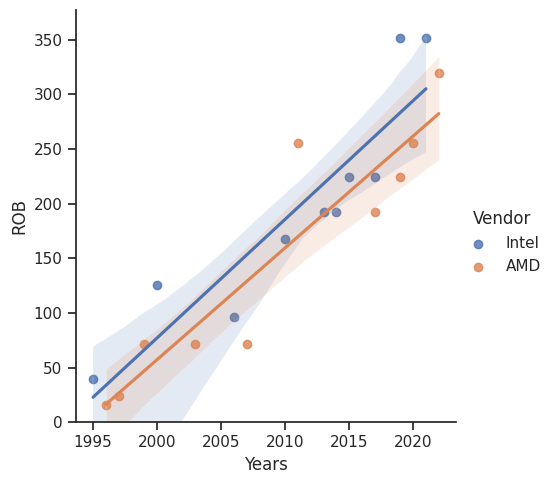

In [42]:
csv = pd.read_csv('./dataset/processor_metadata.csv', encoding= 'utf-8')

sns.set_theme(style="ticks")

sns.lmplot(data=csv, x="Years", y="Decode Width", hue="Vendor")
# sns.lmplot(data=csv, x="Years", y="ALU Count", hue="Vendor", robust=True)
# sns.lmplot(data=csv, x="Years", y="AGU Count", hue="Vendor", robust=True)
rob = sns.lmplot(data=csv, x="Years", y="ROB", hue="Vendor")
rob.set(ylim=(0, None))
# sns.lmplot(data=csv, x="Years", y="Int. Scheduler", hue="Vendor", robust=True)


The above figures show the evolution of processor scale. We could observe there were outliers in the history (e.g., ROB figure, Intel in 2000, AMD in 2011, and Intel in 2020 and 2021). The early outliers quickly fell back to the trend, indicating that they are design failures. The later outliers (Intel in 2020 and 2021) show the great improvement of Intel processors. We believe it is caused by the powerful CPU from AMD after 2016. The stable issue of the decode width of Intel processors between 2012 to 2017 is evidence that AMD cannot threaten Intel until its new design was released in 2016 (whose decode width jumps to 6 after 2016).